### 背景说明

　　滇池也称昆明湖、昆明池，古称滇南泽，位于中国云南省省会昆明市西南部，为云南省面积最大的高原淡水湖，也是中国第六大淡水湖。建立水质预测模型，有利于滇池水质保护工作。请使用本题提供的滇池流域某水文监测站点的检测数据，应用大数据分析技术，进行滇池水质数据的处理、分析，并尝试建立滇池水质预测模型。

### 数据

　　本数据采集并简化滇池流域某水文监测站的历史数据，具体内容如下表所示：


- **数据样例**

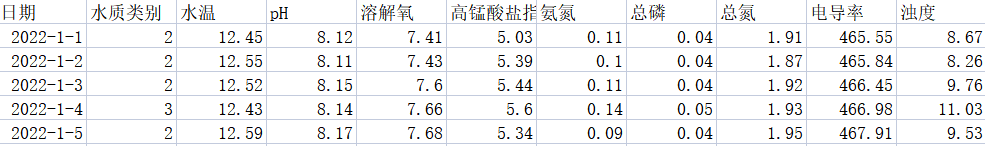
- **字段解读**

| 字段名称          | 字段说明                  |
| ------------------| ------------------------ |
| 日期	| 水质数据采集的时间，由2022/1/1至2024/1/1，每日一条，共731条。| 
| 水质类别	| 按功能高低依次划分为五类：Ⅰ-Ⅴ，低于Ⅴ类的划分为劣Ⅴ类。| 
| 水温	| 水体温度| 
| PH	| 衡量水体酸碱度的一个重要参数| 
| 溶解氧	| 溶解在水中的分子态氧，反映了水中氧气的浓度| 
| 高锰酸盐指数	| 衡量水体中可被高锰酸钾（KMnO4）氧化的有机和无机还原性物质的总量| 
| 氨氮	| 以游离氨（NH₃）和铵离子（NH₄⁺）形式存在于水中的氮元素总量| 
| 总磷	| 水中所有磷化合物的总量| 
| 总氮	| 水样中所有形态氮的总和| 
| 电导率	| 水溶液传导电流的能力| 
| 浊度	| 水体中悬浮颗粒物对光线穿透和散射的程度| 


### 题目

1、高锰酸盐指数是反映水体中有机和无机可氧化物质污染的常用指标，请计算给定数据中高锰酸盐指数的平均值与中位数（结果保留小数点后 2 位）。  
2、水体中的磷是藻类生长需要的一种关键元素，过量磷是造成水体污秽异臭，使湖泊发生富营养化和海湾出现赤潮的主要原因。请计算给定数据中总磷的最大值与最小值（结果保留小数点后 2 位）。  
3、统计各项指标的缺失值个数。  
4、使用插值法进行缺失值的填充，显示填充后的数据情况。  
5、绘制水温的时序图，保存为5.JPG。  
6、绘制水质类别频数柱状图，保存为6.JPG。  
7、从原数据中提取X、Y变量。Y为类别变量，X为自变量。按照8:2的比例划分为训练和测试集，划分过程中需考虑类别比例。将划分结果保存为X_train.CSV、X_test.CSV、y_train.CSV、y_test.CSV  
8、对划分后的训练集和测试集中的X进行标准化处理，结果保存为X_train_scaled.CSV与X_test_scaled.CSV  
9、建立适当的模型，对水质类别进行预测。我们将使用秘密数据集对您建立的模型进行测试，输出秘密测试集准确率。根据准确率计算得分：  
| 准确率	| 得分| 
| --------| ------| 
| 50%以下	| 7分| 
| 50%—60%	| 9分| 
| 60%—70%	| 11分| 
| 70%—80%	| 13分| 
| 80%以上	| 15分|


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest 

#设置画图中文可显示
plt.rcParams['font.sans-serif'] = 'SimHei'

import os
import pandas as pd


# 读取CSV文件
file_name = '水质数据.csv'  # 请将这里的文件名替换为您实际的文件名
row_data = pd.read_csv(file_name)

# 查看数据总数
print(len(row_data))

731


<font size=3 color=#0000dd>1、计算给定数据中高锰酸盐指数的平均值与中位数。</font>

In [2]:
# 计算"高锰酸盐指数"列的平均值
average = row_data['高锰酸盐指数'].mean()
print("平均值:", average)

# 计算"高锰酸盐指数"列的中位数
median = row_data['高锰酸盐指数'].median()
print("中位数:", median)

平均值: 6.4590424076607516
中位数: 6.16


<font size=3 color=#0000dd>2、计算给定数据中总磷的最大值与最小值。</font>

In [3]:
# 计算"总磷"列的最小值
minimum = row_data['总磷'].min()
print("最小值:", minimum)

# 计算"总磷"列的最大值
max = row_data['总磷'].max()
print("最大值:", max)

最小值: 0.03
最大值: 0.14


<font size=3 color=#0000dd>3、统计各项指标的缺失值个数。</font>

In [4]:
row_data.isna().sum()#查看是否有缺失值

日期        0
水质类别      0
水温        7
pH        4
溶解氧       4
高锰酸盐指数    0
氨氮        0
总磷        0
总氮        0
电导率       0
浊度        0
dtype: int64

<font size=3 color=#0000dd>4、使用插值法进行缺失值的填充，将填充后的数据保存在4.CSV中。</font>

In [5]:
# 缺失值处理
for col in row_data.columns:
    if row_data[col].isna().any():  # 检查当前列是否有缺失值
        row_data[col] = row_data[col].interpolate(method='linear', limit_direction='forward')  # 插值法填充

# 打印每列的缺失值数量
print(row_data.isna().sum())

# 将处理后的数据保存为新的CSV文件
row_data.to_csv('4.csv', index=False)

日期        0
水质类别      0
水温        0
pH        0
溶解氧       0
高锰酸盐指数    0
氨氮        0
总磷        0
总氮        0
电导率       0
浊度        0
dtype: int64


<font size=3 color=#0000dd>5、绘制水温的时序图，保存为5.JPG。</font>

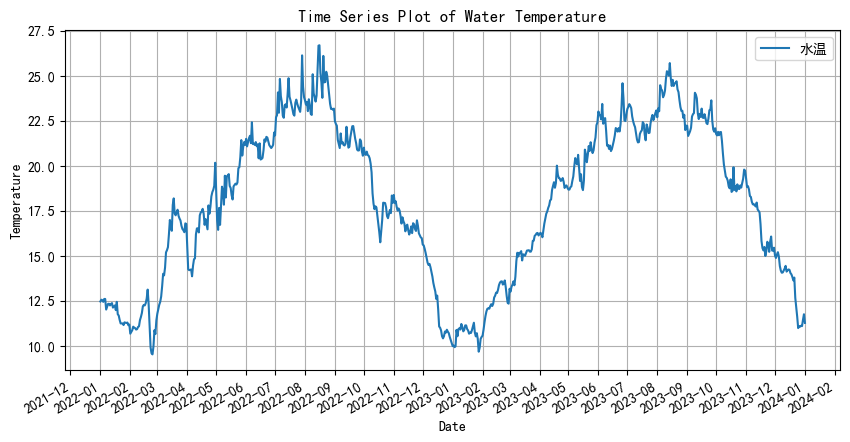

In [6]:
# 将 'row_data' 数据框中的 '日期' 列转换为日期时间格式
row_data['日期'] = pd.to_datetime(row_data['日期'])

plt.figure(figsize=(10, 5))  # 设置图形大小

# 直接绘制 '水温' 列的时序图
plt.plot(row_data['日期'], row_data['水温'], label='水温')

plt.title('Time Series Plot of Water Temperature')  # 图标题
plt.xlabel('Date')  # x轴标签
plt.ylabel('Temperature')  # y轴标签???

# 设置x轴日期间隔为每个月
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式为年-月
plt.gcf().autofmt_xdate()  # 自动调整日期标签格式和间距

plt.legend()
plt.grid(True)

# 保存图表到文件
plt.savefig('5.JPG', dpi=300)
plt.show()  # 显示图形

<font size=3 color=#0000dd>6、绘制水质类别频数柱状图，保存为6.JPG。</font>

3    348
4    171
5    127
2     85
Name: 水质类别, dtype: int64


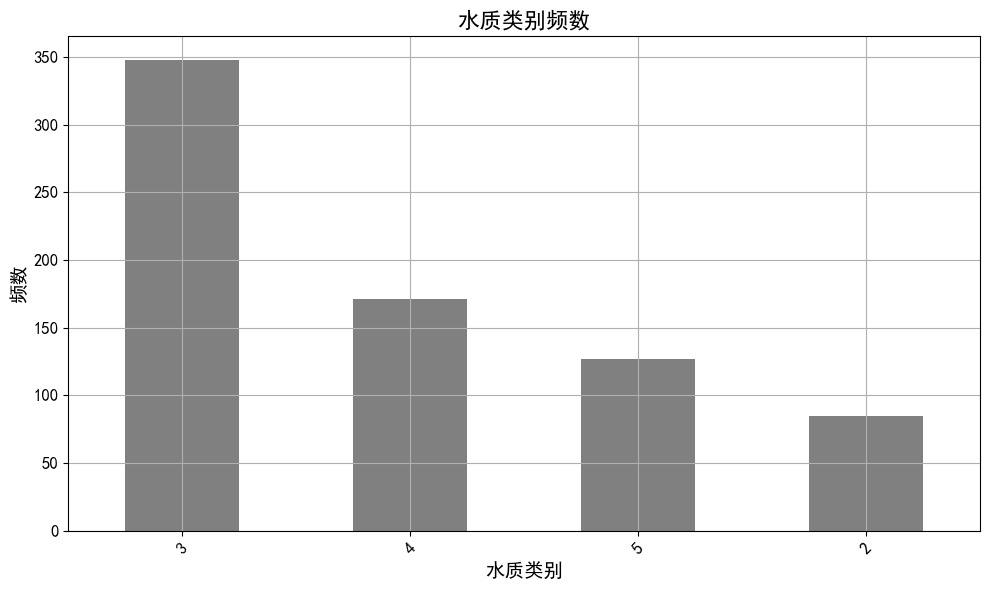

In [7]:
# 计算每个类别的频数  
category_counts = row_data['水质类别'].value_counts()
print(category_counts)
plt.figure(figsize=(10, 6))  # 设置图形大小
category_counts.plot(kind='bar', color='grey')  # 绘制条形图，设置颜色为蓝色
plt.title('水质类别频数', fontsize=16)  # 设置标题，调整字体大小
plt.xlabel('水质类别', fontsize=14)  # 设置x轴标签，调整字体大小???
plt.ylabel('频数', fontsize=14)  # 设置y轴标签，调整字体大小
plt.xticks(rotation=45, fontsize=12)  # 设置x轴标签旋转角度和字体大小以便更好显示
plt.yticks(fontsize=12)  # 设置y轴标签字体大小
plt.grid(True)  # 添加网格线
plt.tight_layout()  # 调整布局，防止内容被裁切

# 保存图表到文件
plt.savefig('6.JPG', dpi=300)

plt.show()  # 显示图形

In [9]:
# 计算每个类别的频率
total_samples = category_counts.sum()
class_frequencies = category_counts / total_samples

# 计算类别权重，取频率的倒数
class_weights = 1 / class_frequencies

print("类别权重:", class_weights)

类别权重: 3    2.100575
4    4.274854
5    5.755906
2    8.600000
Name: 水质类别, dtype: float64


<font size=3 color=#0000dd>7、从原数据中提取X，Y变量。Y为类别变量，X为因变量矩阵。按照8:2的比例划分为训练和测试集，划分过程中需考虑类别比例。</font>

In [10]:
from sklearn.preprocessing import StandardScaler
# 设置类别权重
class_weights={2:8.600000,
               3:2.100575,
               4:4.274854,
               5:5.755906}


X = row_data.iloc[:,2:]
y = row_data['水质类别']

# 将数据集分为训练集和测试集，确保每个类别都有样本
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 保存 X_train 和 y_train 到本地
X_train.to_csv('X_train.csv', index=False)
y_train.to_frame().to_csv('y_train.csv', index=False)

# 保存 X_test 和 y_test 到本地
X_test.to_csv('X_test.csv', index=False)
y_test.to_frame().to_csv('y_test.csv', index=False)

<font size=3 color=#0000dd>8、对划分后的训练集和测试集进行标准化处理。</font>

In [12]:
# 初始化标准化器
scaler = StandardScaler()

# 对训练集中的特征进行标准化
X_train_scaled = scaler.fit_transform(X_train)

# 使用同样的标准化器对测试集进行标准化
X_test_scaled = scaler.transform(X_test)

# 将NumPy数组转换为Pandas DataFrame
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 保存标准化后的训练集到本地
X_train_df.to_csv('X_train_scaled.csv', index=False)

# 保存标准化后的测试集到本地
X_test_df.to_csv('X_test_scaled.csv', index=False)

<font size=3 color=#0000dd>9、建立适当的模型，对水质类别进行预测。</font>

In [13]:
# 定义随机森林分类器
rf = RandomForestClassifier(n_estimators=200, class_weight=class_weights, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# 使用StratifiedKFold进行5折交叉验证
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数组合
print("Best parameters found: ", grid_search.best_params_)
print()

# 输出交叉验证的最佳分数
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print()

# 在测试集上评估最佳模型
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy of best model: {:.2f}".format(test_accuracy))

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best cross-validation accuracy: 0.80

Test set accuracy of best model: 0.82


In [14]:
# 使用秘密数据集进行测试
new_data = pd.read_csv('秘密数据集X.csv')
new_target = pd.read_csv('秘密数据集y.csv')
predictions = best_rf.predict(new_data)
new_accuracy = accuracy_score(new_target, predictions)
print("Accuracy on new data set: {:.2f}".format(new_accuracy))

Accuracy on new data set: 0.55
